In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df_train = pd.read_csv('/content/Train_data.csv')
df_test = pd.read_csv('/content/test_data.csv')
df_test = df_test.drop('Unnamed: 0',axis=1)

In [46]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [47]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [48]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

In [49]:
print(Y_train.apply(lambda col: col.unique()))

  xAttack
0  normal
1     dos
2     r2l
3   probe
4     u2r


In [50]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [51]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

In [52]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [53]:
numerical_cols = df_train.select_dtypes(include=np.number).columns
descriptive_stats = df_train[numerical_cols].describe()

# Transpose the table for better readability (optional)
descriptive_stats = descriptive_stats.T

# Display the table
print(descriptive_stats)

# You can also style the table for better presentation:
# (This requires installing the 'Jinja2' package: !pip install Jinja2)

styled_table = descriptive_stats.style.format("{:.2f}") \
    .set_caption("Descriptive Statistics") \
    .set_properties(**{'border': '1px solid black', 'padding': '6px'})

styled_table

                                count          mean           std  min    25%  \
duration                     125973.0    287.144650  2.604515e+03  0.0   0.00   
service                      125973.0     32.086288  1.646257e+01  1.0  20.00   
flag                         125973.0      2.575179  1.141552e+00  1.0   2.00   
src_bytes                    125973.0  45566.743000  5.870331e+06  0.0   0.00   
dst_bytes                    125973.0  19779.114421  4.021269e+06  0.0   0.00   
land                         125973.0      0.000198  1.408607e-02  0.0   0.00   
wrong_fragment               125973.0      0.022687  2.535300e-01  0.0   0.00   
urgent                       125973.0      0.000111  1.436603e-02  0.0   0.00   
hot                          125973.0      0.204409  2.149968e+00  0.0   0.00   
num_failed_logins            125973.0      0.001222  4.523914e-02  0.0   0.00   
logged_in                    125973.0      0.395736  4.890101e-01  0.0   0.00   
num_compromised             

,count,mean,std,min,25%,50%,75%,max
duration,125973.00,287.14,2604.52,0.00,0.00,0.00,0.00,42908.00
service,125973.00,32.09,16.46,1.00,20.00,25.00,50.00,70.00
flag,125973.00,2.58,1.14,1.00,2.00,2.00,4.00,11.00
src_bytes,125973.00,45566.74,5870331.18,0.00,0.00,44.00,276.00,1379963888.00
dst_bytes,125973.00,19779.11,4021269.15,0.00,0.00,0.00,516.00,1309937401.00
land,125973.00,0.00,0.01,0.00,0.00,0.00,0.00,1.00
wrong_fragment,125973.00,0.02,0.25,0.00,0.00,0.00,0.00,3.00
urgent,125973.00,0.00,0.01,0.00,0.00,0.00,0.00,3.00
hot,125973.00,0.20,2.15,0.00,0.00,0.00,0.00,77.00
num_failed_logins,125973.00,0.00,0.05,0.00,0.00,0.00,0.00,5.00


In [54]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


In [55]:
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


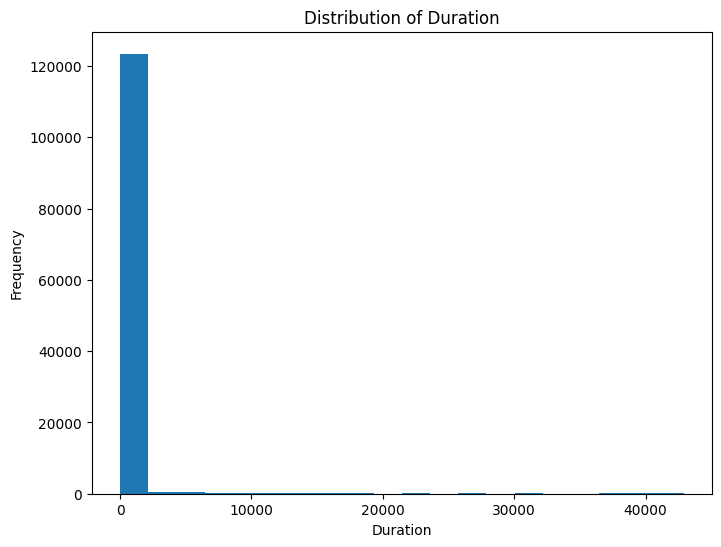

In [56]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(df_train['duration'], bins=20)  # Adjust the number of bins as needed
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

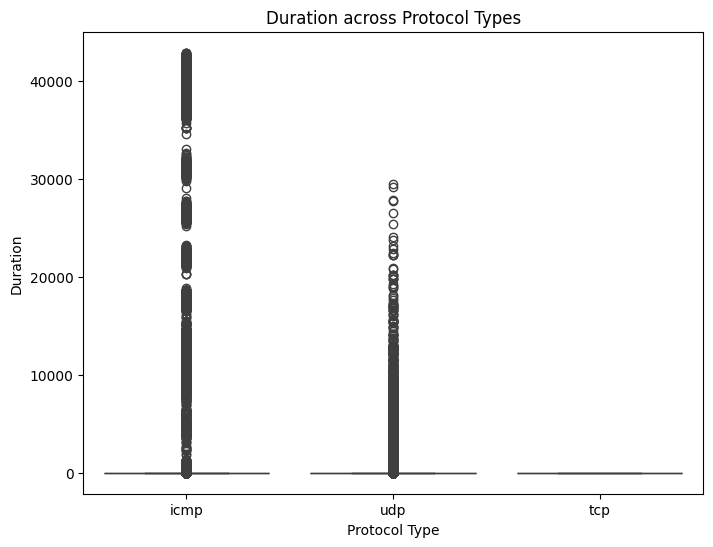

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='protocol_type', y='duration', data=df_train)
plt.title('Duration across Protocol Types')
plt.xlabel('Protocol Type')
plt.ylabel('Duration')
plt.show()

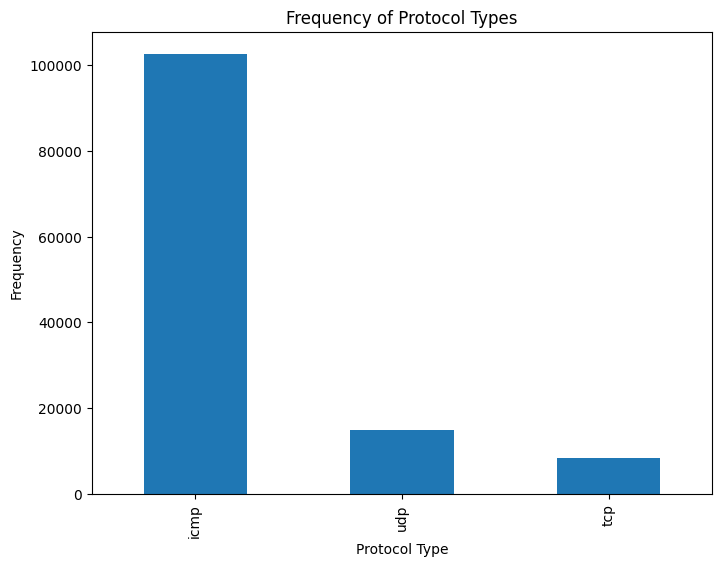

In [58]:
plt.figure(figsize=(8, 6))
df_train['protocol_type'].value_counts().plot(kind='bar')
plt.title('Frequency of Protocol Types')
plt.xlabel('Protocol Type')
plt.ylabel('Frequency')
plt.show()

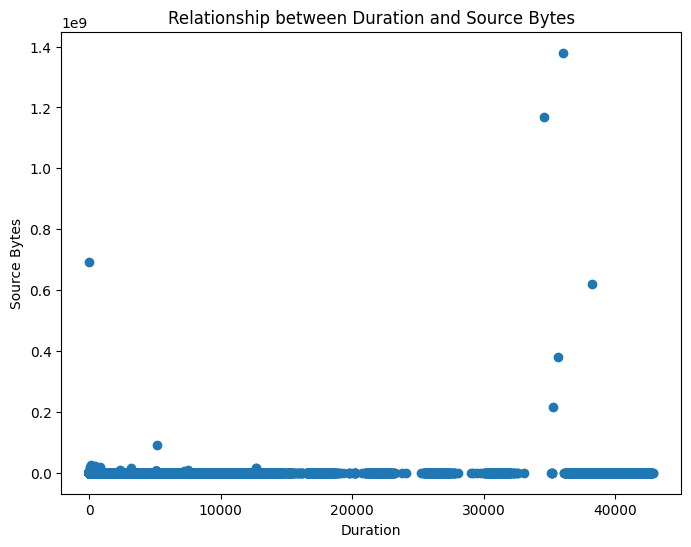

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(df_train['duration'], df_train['src_bytes'])
plt.title('Relationship between Duration and Source Bytes')
plt.xlabel('Duration')
plt.ylabel('Source Bytes')
plt.show()

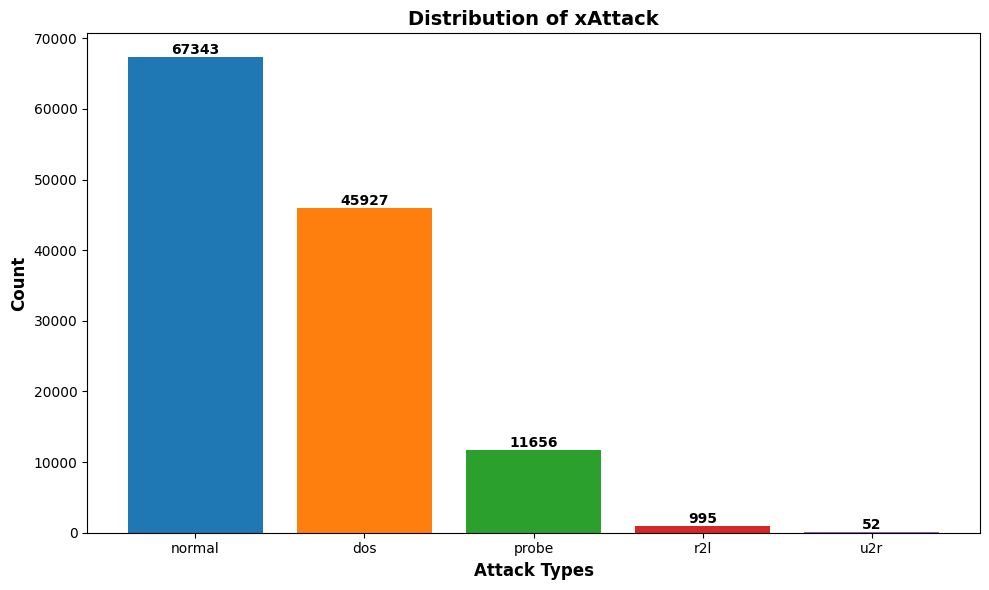

In [60]:
attack_names = {
    0: 'Normal',
    1: 'DoS',
    2: 'Probe',
    3: 'R2L',
    4: 'U2R'
}

# Count the occurrences of each attack type
attack_counts = df_train['xAttack'].value_counts()

# Map numeric values to attack names
attack_labels = [attack_names.get(label, label) for label in attack_counts.index]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(attack_labels, attack_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Add labels and title
plt.xlabel('Attack Types', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.title('Distribution of xAttack', fontsize=14, weight='bold')

# Display value labels on top of each bar
for i, value in enumerate(attack_counts):
    plt.text(i, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=10, weight='bold')

# Show the bar graph
plt.tight_layout()
plt.show()

In [61]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

In [63]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


In [64]:
from sklearn import linear_model
LR = linear_model.LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

In [65]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.33 %


In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [67]:
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='sqrt', bootstrap=True) # Changed max_features to 'sqrt'
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='sqrt', bootstrap=False)  # Changed max_features to 'sqrt'
GB = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=200, max_features='sqrt') # Changed max_features to 'sqrt'

In [68]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

In [69]:
RF.fit(X_train, Y_train)
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.745 %


In [70]:
ET.fit(X_train, Y_train)
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.754 %


In [71]:
GB.fit(X_train, Y_train)
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.343 %


In [72]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,

                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,RandomForest,ExtraTree,GradientBoost
0,duration,0.003357,0.004186,0.002789
1,protocol_type,0.030875,0.017409,0.020620
2,service,0.026271,0.026965,0.028604
3,flag,0.015775,0.009493,0.015256
4,src_bytes,0.206776,0.024393,0.109330
5,dst_bytes,0.094995,0.009632,0.159980
6,land,0.000079,0.000035,0.000048
7,wrong_fragment,0.004335,0.017489,0.001948


[Text(0, 0, 'duration'),
 Text(1, 0, 'protocol_type'),
 Text(2, 0, 'service'),
 Text(3, 0, 'flag'),
 Text(4, 0, 'src_bytes'),
 Text(5, 0, 'dst_bytes'),
 Text(6, 0, 'land'),
 Text(7, 0, 'wrong_fragment'),
 Text(8, 0, 'urgent'),
 Text(9, 0, 'hot'),
 Text(10, 0, 'num_failed_logins'),
 Text(11, 0, 'logged_in'),
 Text(12, 0, 'num_compromised'),
 Text(13, 0, 'root_shell'),
 Text(14, 0, 'su_attempted'),
 Text(15, 0, 'num_root'),
 Text(16, 0, 'num_file_creations'),
 Text(17, 0, 'num_shells'),
 Text(18, 0, 'num_access_files'),
 Text(19, 0, 'is_host_login'),
 Text(20, 0, 'is_guest_login'),
 Text(21, 0, 'count'),
 Text(22, 0, 'srv_count'),
 Text(23, 0, 'serror_rate'),
 Text(24, 0, 'srv_serror_rate'),
 Text(25, 0, 'rerror_rate'),
 Text(26, 0, 'srv_rerror_rate'),
 Text(27, 0, 'same_srv_rate'),
 Text(28, 0, 'diff_srv_rate'),
 Text(29, 0, 'srv_diff_host_rate'),
 Text(30, 0, 'dst_host_count'),
 Text(31, 0, 'dst_host_srv_count'),
 Text(32, 0, 'dst_host_same_srv_rate'),
 Text(33, 0, 'dst_host_diff_srv_r

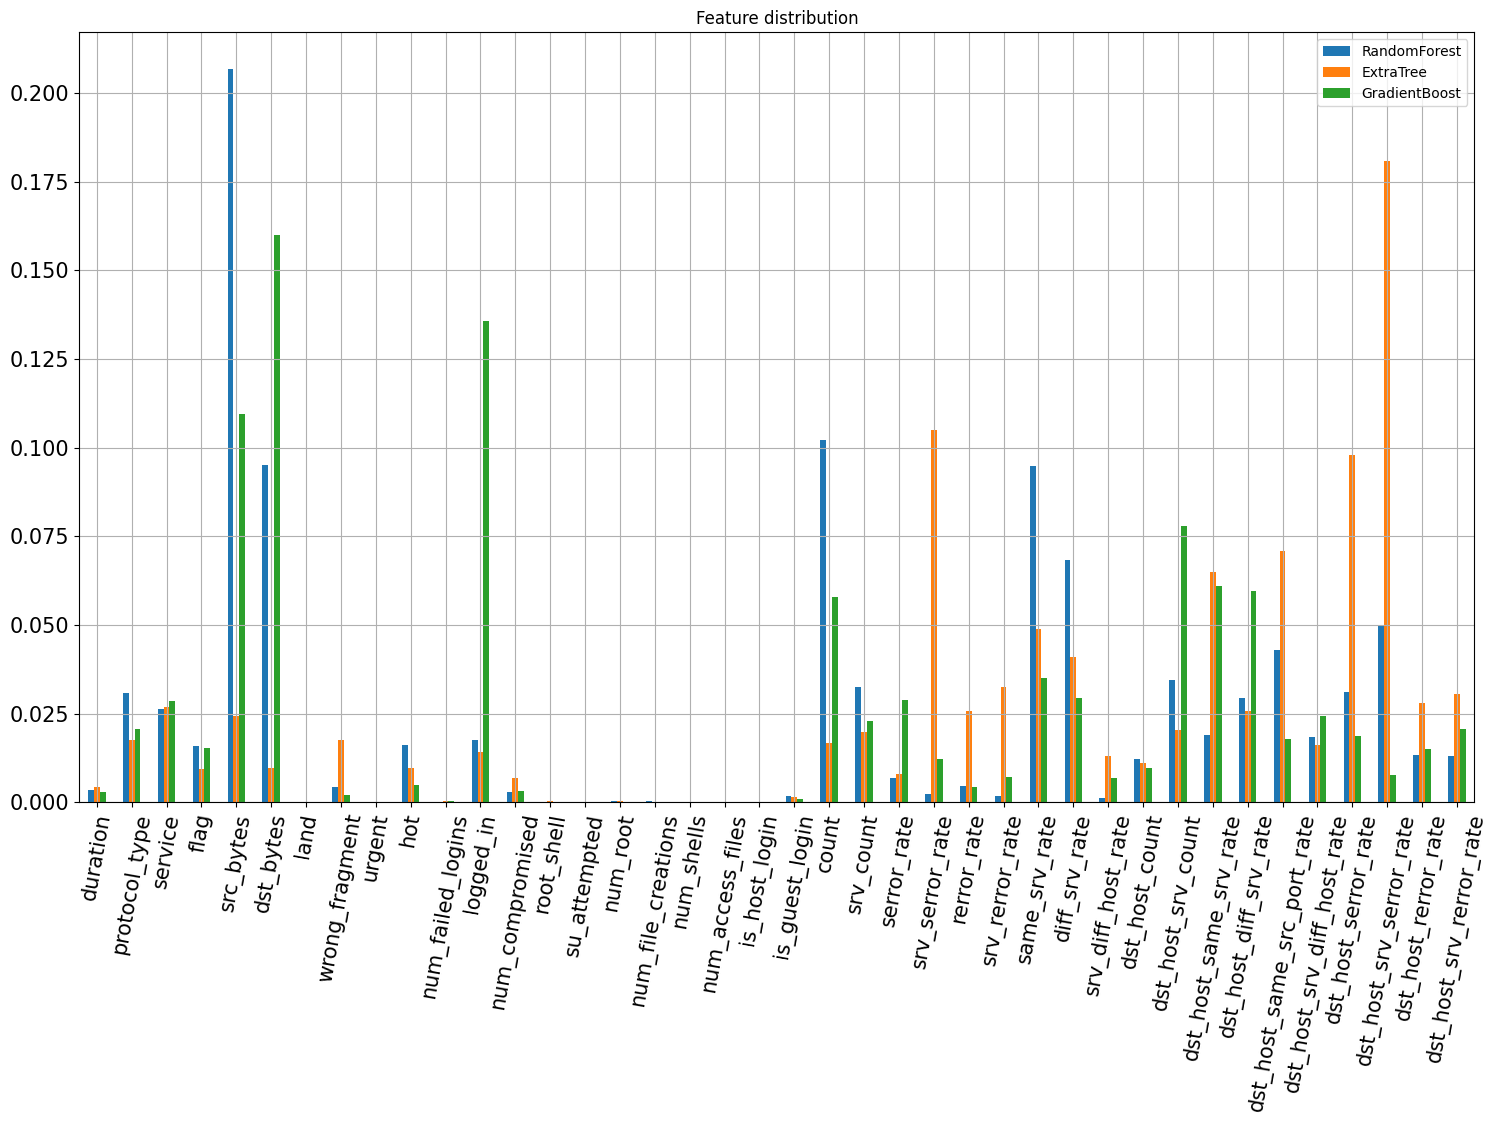

In [73]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15,
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

In [74]:
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

In [75]:
result = pd.concat([e_f, g_f, r_f])
result = result.drop_duplicates() # delete duplicate feature
result

,features,RandomForest,ExtraTree,GradientBoost
37,dst_host_srv_serror_rate,0.049717,0.180766,0.007807
24,srv_serror_rate,0.002234,0.104813,0.012266
36,dst_host_serror_rate,0.031117,0.097805,0.018792
34,dst_host_same_src_port_rate,0.042881,0.070938,0.017708
32,dst_host_same_srv_rate,0.019070,0.064988,0.061028
27,same_srv_rate,0.094715,0.048811,0.035031
28,diff_srv_rate,0.068339,0.040847,0.029391
26,srv_rerror_rate,0.001834,0.032494,0.007136
39,dst_host_srv_rerror_rate,0.012992,0.030587,0.020519
38,dst_host_rerror_rate,0.013343,0.027864,0.015044


In [76]:
selected_features = result['features'].values.tolist()
selected_features

['dst_host_srv_serror_rate',
 'srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_rerror_rate',
 'service',
 'rerror_rate',
 'dst_bytes',
 'logged_in',
 'src_bytes',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'count',
 'serror_rate',
 'dst_host_srv_diff_host_rate',
 'srv_count',
 'protocol_type']

In [77]:
RF.fit(X_train_stdrop, Y_train)
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.772 %


In [78]:
ET.fit(X_train_stdrop, Y_train)
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.766 %


In [79]:
GB.fit(X_train_stdrop, Y_train)
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.28 %


In [80]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,dst_host_srv_serror_rate,srv_serror_rate,dst_host_serror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,same_srv_rate,diff_srv_rate,srv_rerror_rate,dst_host_srv_rerror_rate,dst_host_rerror_rate,...,dst_bytes,logged_in,src_bytes,dst_host_srv_count,dst_host_diff_srv_rate,count,serror_rate,dst_host_srv_diff_host_rate,srv_count,protocol_type
0,0.65,1.0,0.65,0.00,1.00,1.0,0.0,0.0,0.32,0.32,...,0,0,0,255,0.00,110,1.0,0.00,110,0
1,0.00,0.0,0.00,1.00,1.00,1.0,0.0,0.0,0.00,0.00,...,1856,1,312,254,0.00,1,0.0,0.06,9,0
2,0.00,0.0,0.01,0.01,1.00,1.0,0.0,0.0,0.00,0.00,...,2058,1,245,255,0.00,5,0.0,0.05,5,0
3,0.00,0.0,0.00,0.00,1.00,1.0,0.0,0.0,0.00,0.00,...,1267,1,298,255,0.00,4,0.0,0.00,18,0
4,0.00,0.0,0.00,0.18,0.18,1.0,0.0,0.0,0.00,0.00,...,0,0,740,19,0.03,1,0.0,0.00,1,0


<Axes: >

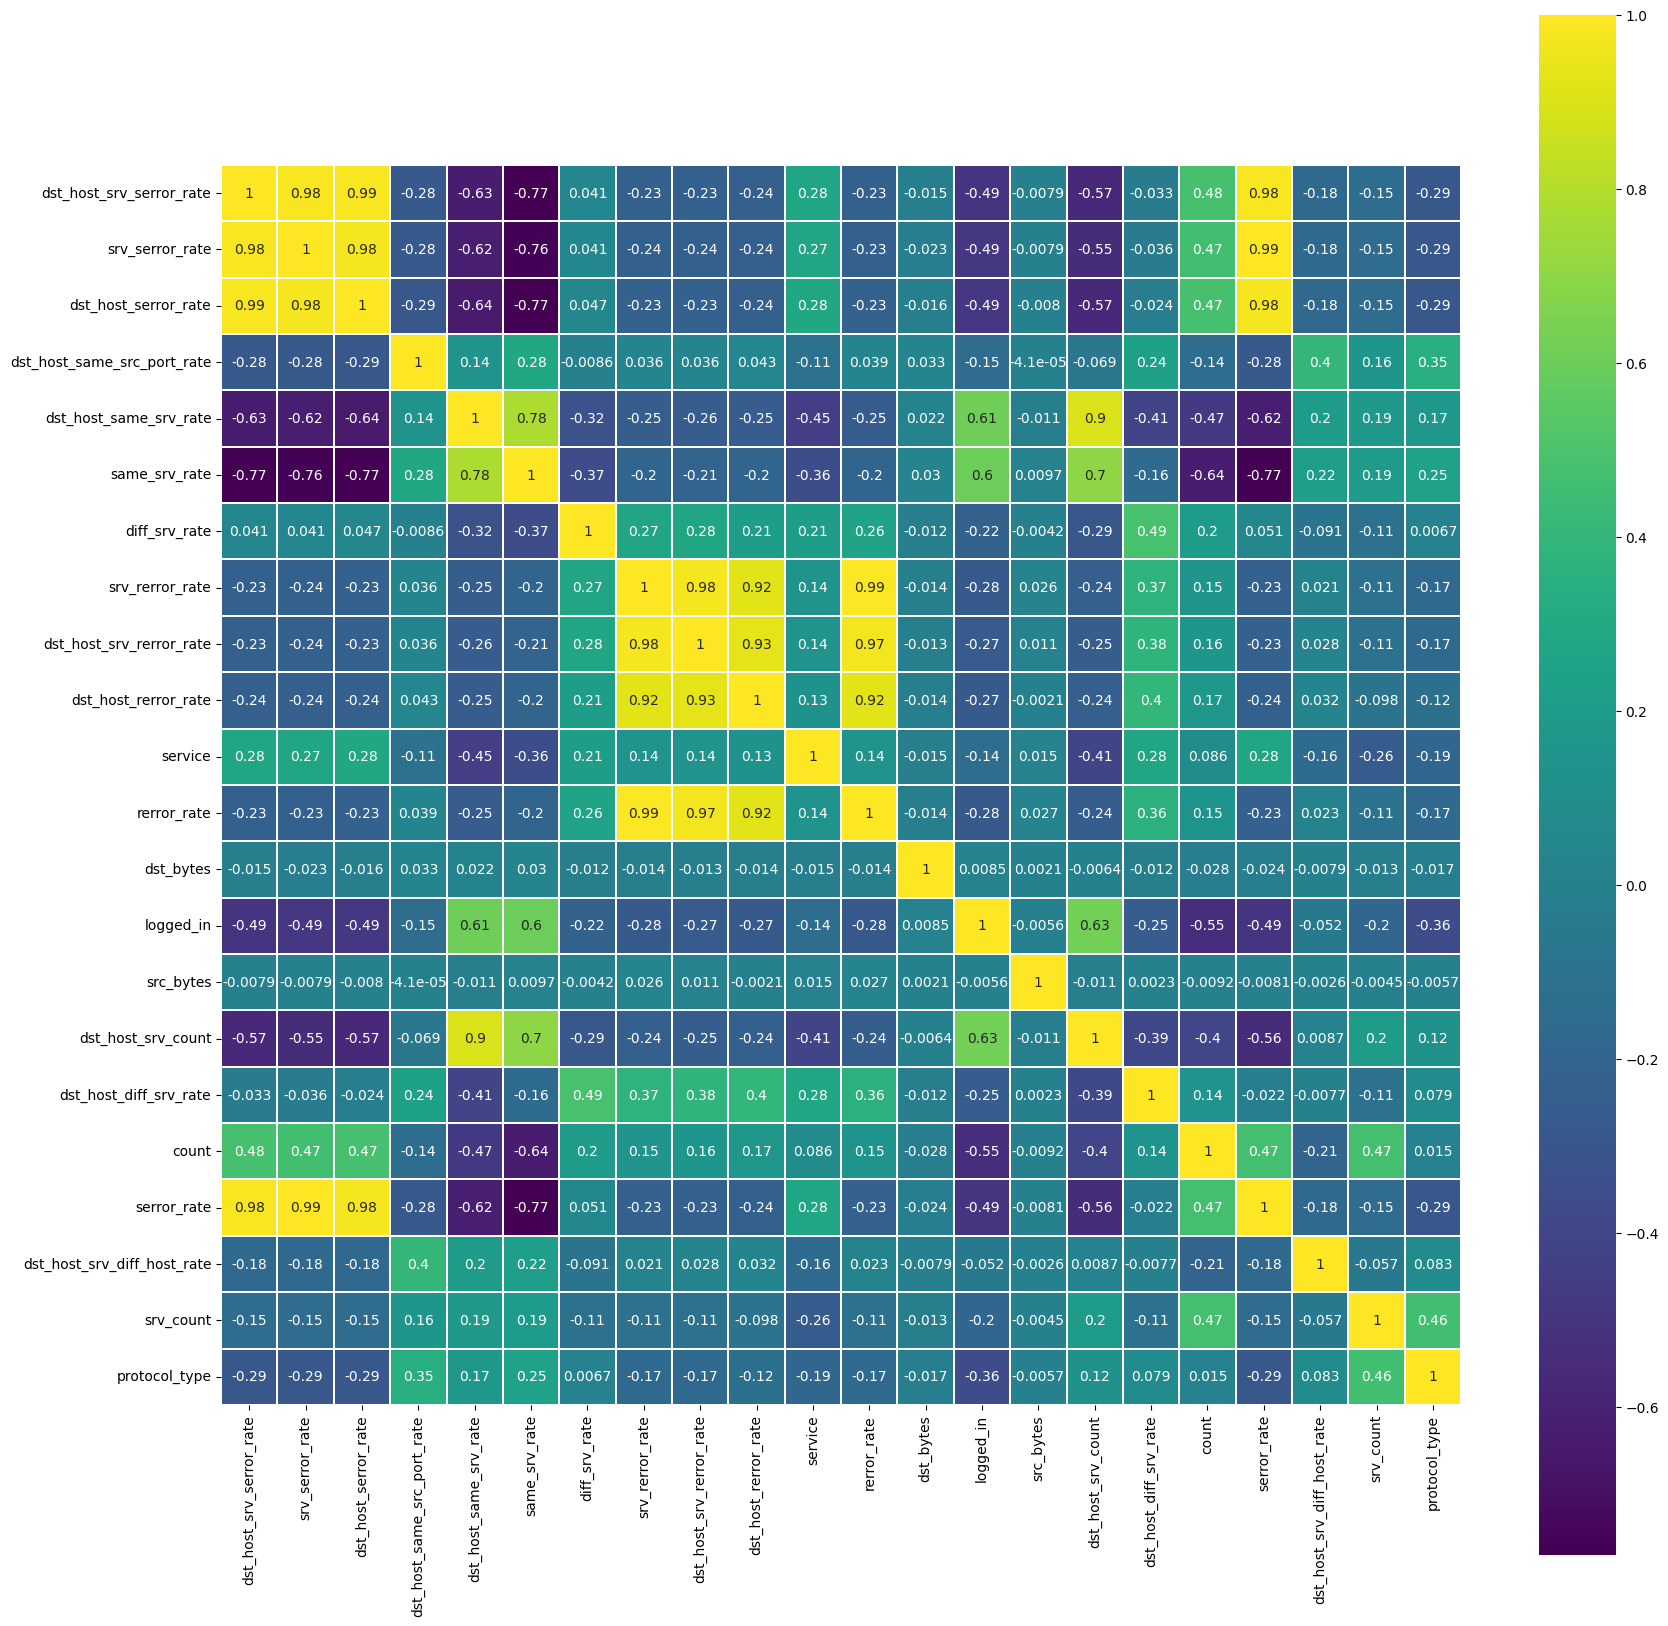

In [81]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [82]:
selected2 = ['dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1) # Ensures same columns are dropped
X_test_cordrop.describe()

,dst_host_srv_serror_rate,srv_serror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,same_srv_rate,diff_srv_rate,srv_rerror_rate,dst_host_srv_rerror_rate,dst_host_rerror_rate,service,rerror_rate,dst_bytes,logged_in,src_bytes,dst_host_srv_count,dst_host_diff_srv_rate,count,dst_host_srv_diff_host_rate,srv_count,protocol_type
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.097781,0.101696,0.133167,0.605769,0.739925,0.089752,0.238538,0.230181,0.236296,35.451700,0.241316,1.996999e+03,0.436600,6.845032e+03,139.645700,0.089412,80.152400,0.020102,31.730900,0.278600
std,0.279651,0.295464,0.307154,0.436278,0.413711,0.252240,0.418474,0.403294,0.389137,15.824769,0.418059,2.006975e+04,0.495989,8.675409e+04,111.548555,0.218190,129.028094,0.089353,90.353536,0.657134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.070000,0.200000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,15.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.910000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,4.400000e+01,0.000000,5.400000e+01,159.500000,0.020000,8.000000,0.000000,6.000000,0.000000
75%,0.000000,0.000000,0.030000,1.000000,1.000000,0.060000,0.232500,0.220000,0.390000,50.000000,0.330000,5.990000e+02,1.000000,2.850000e+02,255.000000,0.060000,126.000000,0.010000,16.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,1.285078e+06,1.000000,6.291668e+06,255.000000,1.000000,511.000000,1.000000,511.000000,2.000000


In [83]:
RF.fit(X_train_cordrop, Y_train)
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.746 %


In [84]:
ET.fit(X_train_cordrop, Y_train)
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.759 %


In [85]:
LR.fit(X_train_cordrop, Y_train)
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.284 %


In [87]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
MLP.fit(X_train_cordrop, Y_train)
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.686 %


In [88]:
first_model = {'Model': ['Linear Regression',  'RandomForest', 'ExtraTrees'],
               'accuracy' : [lr_score,  rf_score, et_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,RandomForest,0.745400
2,ExtraTrees,0.754100


In [89]:
second_model = {'Model': [ 'RandomForest', 'ExtraTrees'],
               'accuracy' : [ rf2_score, et2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,RandomForest,0.7722
1,ExtraTrees,0.7659


[Text(0, 0, 'RandomForest'), Text(1, 0, 'ExtraTrees')]

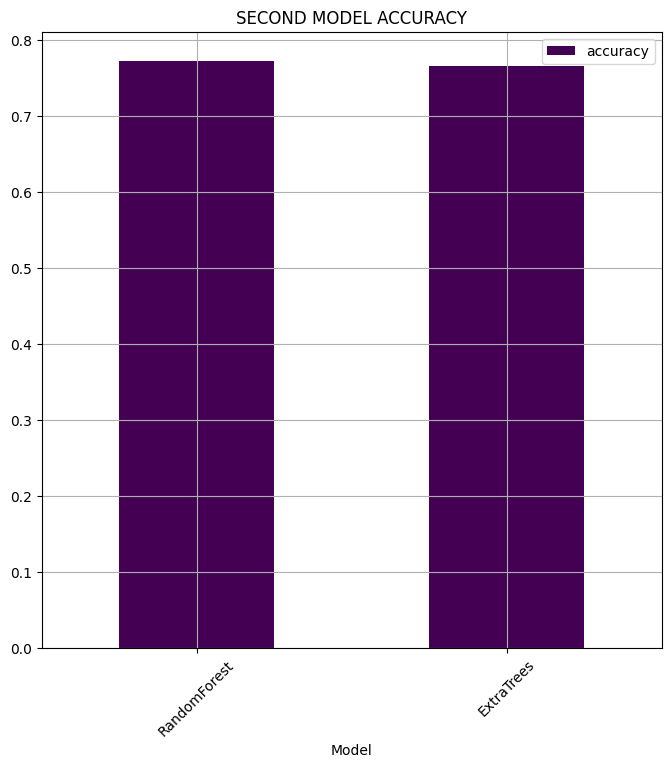

In [90]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis
               )
r2.set_xticklabels(result_df.Model, rotation = 45)

In [91]:
final_model = {'Model': ['Linear Regression',  'RandomForest', 'ExtraTrees', 'MLP'],
               'accuracy' : [lr_finalscore,  rf_finalscore, et_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.283893
1,RandomForest,0.745600
2,ExtraTrees,0.758600
3,MLP,0.686100


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'RandomForest'),
 Text(2, 0, 'ExtraTrees'),
 Text(3, 0, 'MLP')]

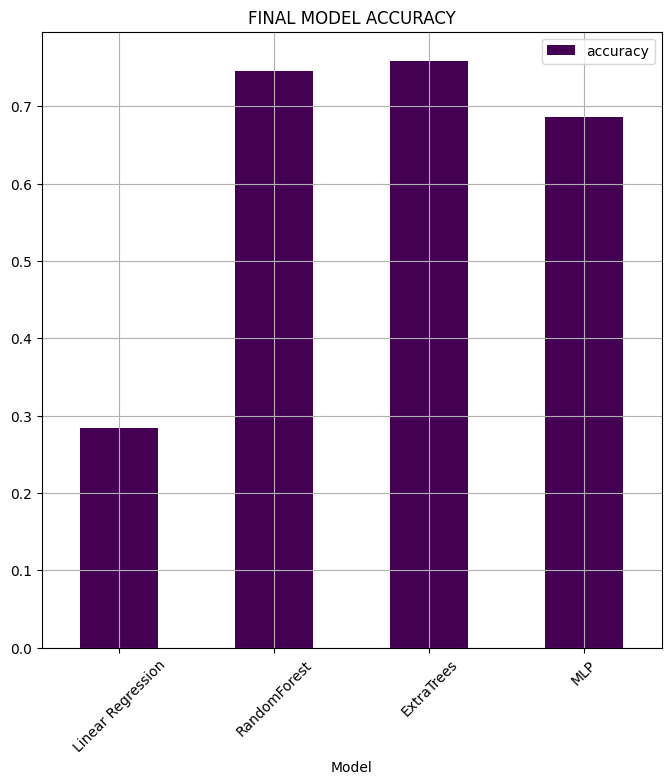

In [92]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis
              )
r3.set_xticklabels(result_df.Model, rotation = 45)

In [93]:
from sklearn.metrics import classification_report

# Assuming you have already trained your models (RF, ET, LR, MLP) and have X_test, Y_test

# Generate classification reports
rf_report = classification_report(Y_test, RF.predict(X_test_cordrop), output_dict=True)
et_report = classification_report(Y_test, ET.predict(X_test_cordrop), output_dict=True)
mlp_report = classification_report(Y_test, MLP.predict(X_test_cordrop), output_dict=True)

In [94]:
from sklearn.metrics import classification_report
import pandas as pd

# Assuming you have already trained your models (RF, ET, LR, MLP) and have X_test, Y_test

# Generate classification reports
rf_report = classification_report(Y_test, RF.predict(X_test_cordrop), output_dict=True)
et_report = classification_report(Y_test, ET.predict(X_test_cordrop), output_dict=True)
  # Assuming LR can predict classes
mlp_report = classification_report(Y_test, MLP.predict(X_test_cordrop), output_dict=True)

# Create a list of model names and reports
models = ['Random Forest', 'Extra Trees', 'Linear Regression', 'MLP']
reports = [rf_report, et_report,  mlp_report]

# Create a list to store data for the table
table_data = []

# Iterate over models and reports
for model, report in zip(models, reports):
    # Extract relevant metrics for each class and averages
    for label, metrics in report.items():
        if label not in ['accuracy', 'macro avg', 'weighted avg']:  # Focus on individual classes
            row = {'Model': model, 'Class': label}
            row.update(metrics)  # Add precision, recall, f1-score, support
            table_data.append(row)

# Create a pandas DataFrame from the table data
comparison_table = pd.DataFrame(table_data)

# Format the numeric columns to two decimal places
comparison_table = comparison_table.style \
    .format({
        'precision': "{:.2f}",
        'recall': "{:.2f}",
        'f1-score': "{:.2f}",
        'support': "{:.0f}"  # Support is usually an integer, so no decimal places
    }) \
    .set_caption("Classification Report Comparison") \
    .highlight_max(subset=['precision', 'recall', 'f1-score'], axis=1, color='lightgreen') \
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score']) \
    .set_properties(**{'border': '1px solid black', 'padding': '6px'})

# Display the formatted table
comparison_table


,Model,Class,precision,recall,f1-score,support
0,Random Forest,0,0.95,0.77,0.85,3332
1,Random Forest,1,0.65,0.97,0.78,4329
2,Random Forest,2,0.81,0.62,0.71,1053
3,Random Forest,3,1.00,0.03,0.06,1199
4,Random Forest,4,0.00,0.00,0.00,87
5,Extra Trees,0,0.96,0.78,0.86,3332
6,Extra Trees,1,0.66,0.97,0.79,4329
7,Extra Trees,2,0.82,0.73,0.77,1053
8,Extra Trees,3,1.00,0.03,0.05,1199
9,Extra Trees,4,0.25,0.01,0.02,87
